In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Stock_market_prediction_dataset.csv'  # Update with the correct file path if needed
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


C:\Users\91705\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB
None

First few rows of the dataset:
         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  24

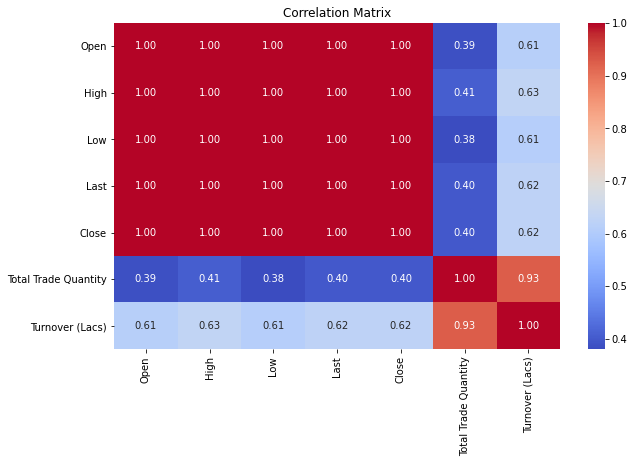

In [2]:
# Visualizing the correlation between numerical features
plt.figure(figsize=(10, 6))

# Exclude non-numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Distribution of a target variable (if applicable, replace 'Target' with the actual column name)
if 'Target' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Target'], kde=True)
    plt.title('Distribution of Target Variable')
    plt.show()

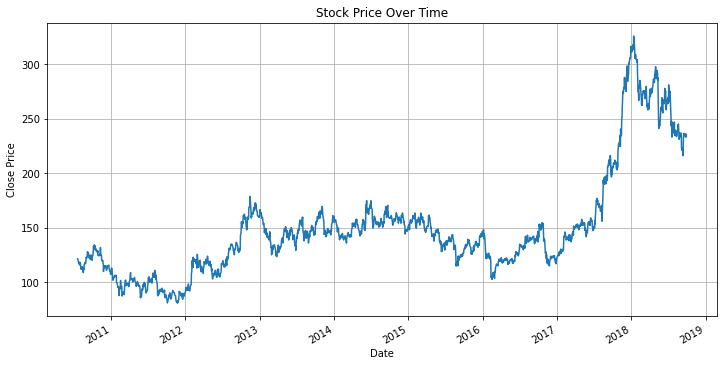

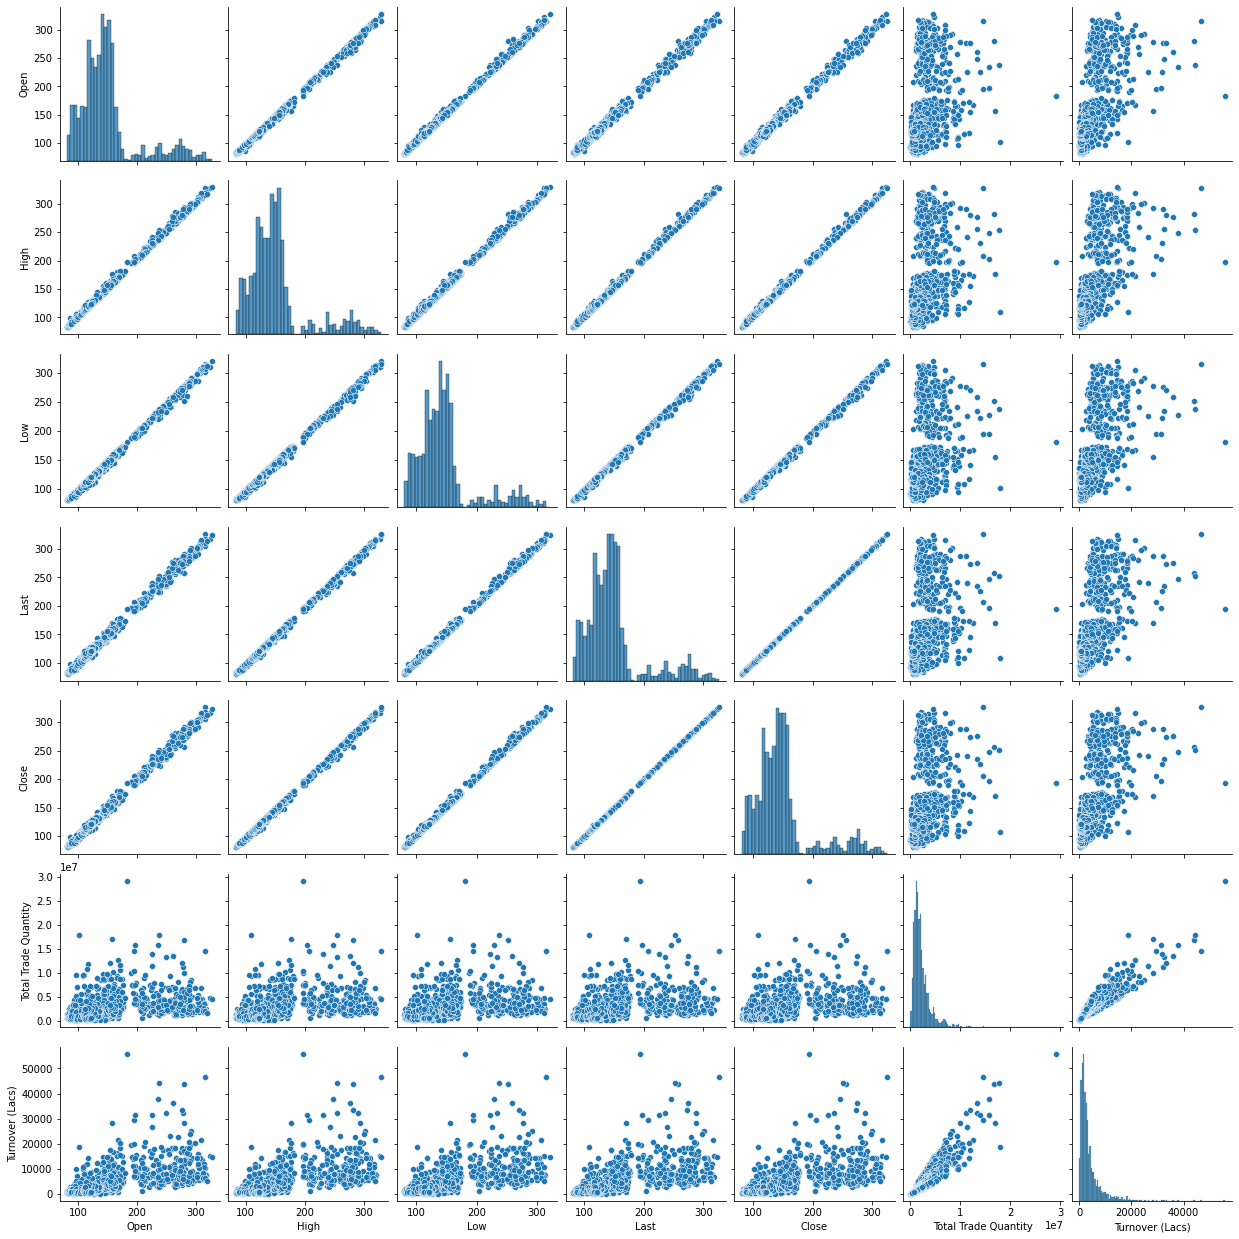

In [3]:
# Time-series analysis (replace 'Date' and 'Close' with appropriate column names)
if 'Date' in data.columns and 'Close' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    plt.figure(figsize=(12, 6))
    data['Close'].plot()
    plt.title('Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid()
    plt.show()
    
# Pairplot for numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
if len(numerical_cols) > 1:
    sns.pairplot(data[numerical_cols])
    plt.show()

In [4]:
# Save cleaned dataset (if any cleaning is performed)
output_file_path = 'Cleaned_Stock_Market_Data.csv'
data.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to: {output_file_path}")

Cleaned dataset saved to: Cleaned_Stock_Market_Data.csv


# Preprocess Data for LSTM

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Focus on the 'Close' price for prediction
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences for LSTM input (e.g., 60 days lookback)
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(X), np.array(y)

lookback = 60  # Adjust the lookback period as needed
X, y = create_sequences(scaled_data, lookback)

# Split into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Print shapes to confirm preprocessing
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1580, 60, 1), y_train shape: (1580, 1)
X_test shape: (395, 60, 1), y_test shape: (395, 1)


# Build and Compile the LSTM Model

In [6]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: astunparse>=1.6.0 in c:\users\91705\anaconda3\lib\site-packages (from tensorflow-intel==2.13.0->tensorflow) (1.6.3)


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\91705\anaconda3\lib\site-packages

In [7]:
pip install --upgrade h5py


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\91705\anaconda3\lib\site-packages

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 

# Train the Model

Epoch 1/50
50/50 [==============================] - 42s 273ms/step - loss: 0.0112 - val_loss: 4.6476e-04
Epoch 2/50
50/50 [==============================] - 8s 161ms/step - loss: 0.0022 - val_loss: 5.0183e-04
Epoch 3/50
50/50 [==============================] - 8s 154ms/step - loss: 0.0019 - val_loss: 6.7843e-04
Epoch 4/50
50/50 [==============================] - 7s 149ms/step - loss: 0.0016 - val_loss: 4.2745e-04
Epoch 5/50
50/50 [==============================] - 8s 157ms/step - loss: 0.0018 - val_loss: 5.5453e-04
Epoch 6/50
50/50 [==============================] - 8s 157ms/step - loss: 0.0015 - val_loss: 7.9120e-04
Epoch 7/50
50/50 [==============================] - 8s 161ms/step - loss: 0.0014 - val_loss: 5.1380e-04
Epoch 8/50
50/50 [==============================] - 8s 159ms/step - loss: 0.0013 - val_loss: 4.1423e-04
Epoch 9/50
50/50 [==============================] - 8s 163ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/50
50/50 [==============================] - 8s 156ms/step 

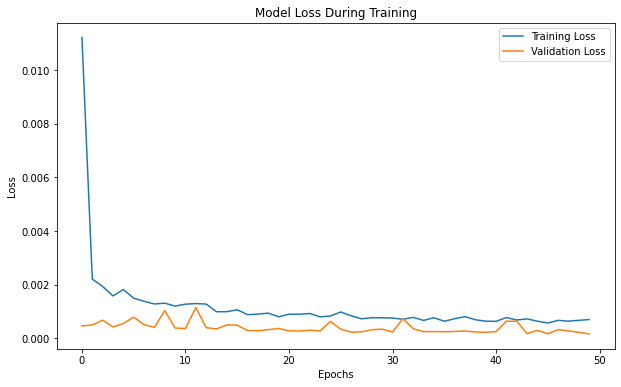

In [9]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make Predictions and Evaluate

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set
predictions = model.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
mae = mean_absolute_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")



13/13 [==============================] - 3s 37ms/step
Root Mean Squared Error (RMSE): 3.15
Mean Absolute Error (MAE): 2.44
R-squared (R²): 0.95


# Visualize Predictions

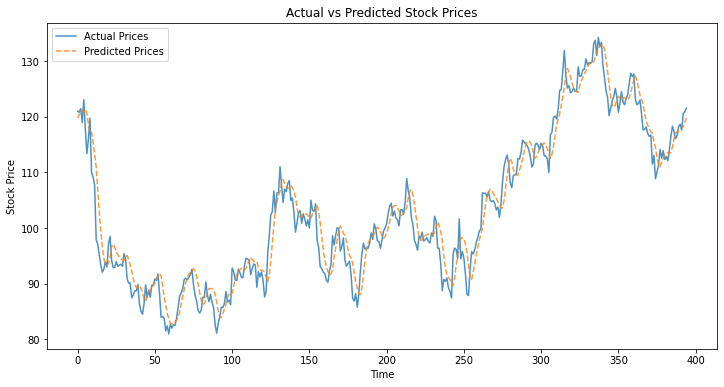

In [11]:
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Prices', alpha=0.8)
plt.plot(predictions, label='Predicted Prices', linestyle='--', alpha=0.8)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Save the Model

In [12]:
# Save the model for future use
model.save("lstm_stock_model.h5")
print("Model saved as lstm_stock_model.h5")


Model saved as lstm_stock_model.h5


C:\Users\91705\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
